In [1]:
# load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

In [2]:
# train data
train_df = pd.read_csv('data/train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
list(train_df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
# columns to use in model
# Ticket // Fare // Cabin for the future
x_train_cols = ["Pclass", "Age", "SibSp", "Parch", "female", "male", "S", "C", "Q"]
y_train_cols = ["Survived"]

In [6]:
# functions for feature engineering
def high_to_low(x):
    if x.Pclass == 3:
        x.Pclass = 1
    elif x.Pclass == 1:
        x.Pclass = 3
    return x

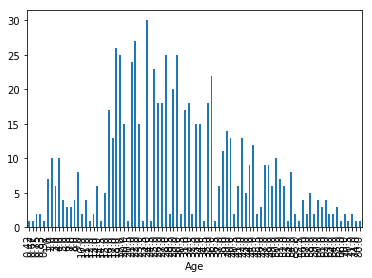

In [7]:
train_df.groupby(train_df['Age'])['Age'].count().plot("bar")

In [8]:
train_df = train_df.apply(high_to_low, axis=1)
train_df.Age = train_df.Age.fillna(train_df.Age.mean())
train_df.Embarked = train_df.Embarked.fillna(train_df.Embarked.mode()[0])

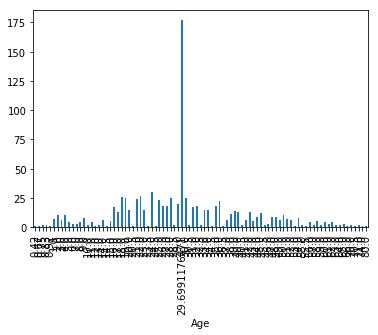

In [9]:
train_df.groupby(train_df['Age'])['Age'].count().plot("bar")

In [10]:
train_df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,1,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
sex_dummy = pd.get_dummies(train_df["Sex"])
train_df = pd.concat([train_df, sex_dummy], axis=1)

embarked_dummy = pd.get_dummies(train_df["Embarked"])
train_df = pd.concat([train_df, embarked_dummy], axis=1)

In [14]:
train_df.shape

(891, 17)

In [15]:
train_y = np.array(train_df[y_train_cols])
train_x = train_df[x_train_cols]

feature_list = list(train_x.columns)
# Convert to numpy array
train_x = np.array(train_x)
print(train_x)

[[  1.          22.           1.         ...,   1.           0.           0.        ]
 [  3.          38.           1.         ...,   0.           1.           0.        ]
 [  1.          26.           0.         ...,   1.           0.           0.        ]
 ..., 
 [  1.          29.69911765   1.         ...,   1.           0.           0.        ]
 [  3.          26.           0.         ...,   0.           1.           0.        ]
 [  1.          32.           0.         ...,   0.           0.           1.        ]]


In [18]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(train_x, train_y.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [ ]:
# train_y.ravel()
# What does ravel() do?

In [38]:
# test data
test_df = pd.read_csv('data/test.csv')

In [39]:
test_df.shape

(418, 11)

In [ ]:
# set the features for the test data

In [40]:
test_df = test_df.apply(high_to_low, axis=1)
test_df.Age = test_df.Age.fillna(train_df.Age.mean())
test_df.Embarked = test_df.Embarked.fillna(train_df.Embarked.mode()[0])

In [41]:
sex_dummy_test = pd.get_dummies(test_df["Sex"])
test_df = pd.concat([test_df, sex_dummy_test], axis=1)

embarked_dummy_test = pd.get_dummies(test_df["Embarked"])
test_df = pd.concat([test_df, embarked_dummy_test], axis=1)

In [42]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S
0,892,1,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,0,1,0,1,0
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,0,1,0,1,0
3,895,1,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,0,1,0,0,1
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,1,0,0,0,1
5,897,1,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,NaN,S,0,1,0,0,1
6,898,1,"Connolly, Miss. Kate",female,30.000000,0,0,330972,7.6292,NaN,Q,1,0,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.000000,1,1,248738,29.0000,NaN,S,0,1,0,0,1
8,900,1,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.000000,0,0,2657,7.2292,NaN,C,1,0,1,0,0
9,901,1,"Davies, Mr. John Samuel",male,21.000000,2,0,A/4 48871,24.1500,NaN,S,0,1,0,0,1


In [43]:
test_x = test_df[x_train_cols]
feature_list = list(test_x.columns)
# Convert to numpy array
test_x = np.array(test_x)
print(test_x.shape)

(418, 9)


In [44]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S
0,892,1,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,1,0
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,1,0
3,895,1,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1,0,0,1
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,0,0,1


In [45]:
predictions = clf.predict(test_x)

In [46]:
predictions.shape

(418,)

In [48]:
result_dict = {'PassengerId':np.array(test_df["PassengerId"]), 'Survived':predictions}

In [52]:
result_df = pd.DataFrame(result_dict)

In [58]:
result_df.to_csv('predictions.csv', index=False)

![score](predictions.png)